In [1]:
%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import imageio
from random import sample

In [2]:
data = scipy.io.loadmat('ex7data2.mat')
X = data['X']
X.shape

(300, 2)

In [29]:
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

def findClosestCentroids(X, initial_centroids):
    val = []
    idx = []
    for x in X:
        distance = initial_centroids.copy()
        distance = np.sum(pow(distance - x, 2), axis=1)
        min_index = np.argmin(distance)
        #print(min_index, distance[min_index], distance)
        val.append(distance[min_index])
        idx.append(min_index)
        
    return val, idx
# Find the closest centroids for the examples using the
# initial_centroids
val, idx = findClosestCentroids(X, initial_centroids)
print(val[:5])
print(idx[:5])

[3.9250662757747627, 5.522247382566591, 1.7906172319251763, 2.608414928796877, 3.8170032655695043]
[0, 2, 1, 0, 0]


In [46]:
def computeCentroids(X, idx, K):
    centroids = []
    assigned = np.array(idx)
    for k in range(K):
        instances = X[assigned==k]
        #print("for k:", k, "has", len(instances), "instance")
        centroids.append((np.sum(instances, axis=0)/len(instances)).tolist())
    return centroids

centroids = computeCentroids(X, idx, K)
print(centroids)

[[0.6529168943119034, 0.4406726157955442, 0.16465731803557407], [0.9898039215686316, 0.9782924836601313, 0.8231617647058808], [0.13026949079536426, 0.13507001017535586, 0.12534037492743189], [0.8722827402565992, 0.8014524328249829, 0.7926894214475901], [0.8906753812636177, 0.9481045751633986, 0.9410893246187358], [0.5280692089530917, 0.5036053130929791, 0.527889657423844], [0.48762876672763994, 0.403446615962261, 0.3131157536664428], [0.06851479132647359, 0.07457309586197411, 0.06462866618564891], [0.890391667889112, 0.7050608772187168, 0.42846413378318904], [0.6389850057670119, 0.45639589169000966, 0.3472290877135169], [0.7392347600518797, 0.5675478751812, 0.29000152590219025], [0.4204525674499561, 0.2983975835765118, 0.2043567296370253], [0.266992784639844, 0.257555745791041, 0.2580326933268118], [0.9627670881436771, 0.8839179036100419, 0.6556386292834889], [0.7264927023440968, 0.6470907661310121, 0.5366823922551475], [0.3166225048577992, 0.3667019961137611, 0.5277336159689101]]


In [47]:
data = scipy.io.loadmat('ex7data2.mat')
X = data['X']

K = 3
max_iters = 10

initial_centroids = [[3, 3], [6, 2], [8, 5]]


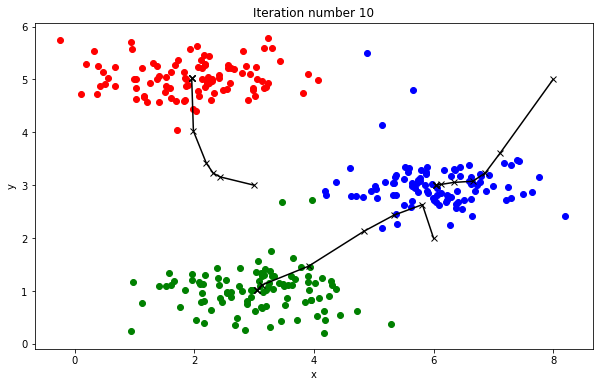

In [48]:
def runKmeans(X, initial_centroids, max_iters, to_plot):
    centroids = initial_centroids.copy()
    history = []
    for i in range(max_iters):
        history.append(centroids)
        val, idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    
  
        
    if to_plot == True:
        plt.figure(figsize=(10,6))
        plt.xlabel("x")
        plt.ylabel("y")
        
        assigned = np.array(idx)
        plt.scatter(X[assigned==0][:,0], X[assigned==0][:,1], color='r')
        plt.scatter(X[assigned==1][:,0], X[assigned==1][:,1], color='g')
        plt.scatter(X[assigned==2][:,0], X[assigned==2][:,1], color='b')
        
        for k in range(K):
            x, y = [], []
            for h in history:
                x.append(h[k][0]); y.append(h[k][1])
            plt.plot(x, y, marker="x", color='k')
        
        plt.title("Iteration number 10")
        
        plt.show()

        
runKmeans(X, initial_centroids, max_iters, True)

[[3.29765181 5.59205535]
 [4.13835915 1.24780979]
 [2.66046572 5.19623848]]


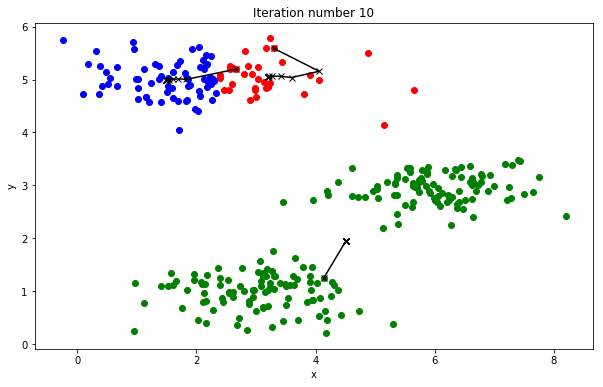

In [49]:
random_centroids = X[sample(range(len(X)), K)]
print(random_centroids)
runKmeans(X, random_centroids, max_iters, True)

In [50]:
img = imageio.imread('bird_small.png')
img.shape

(128, 128, 3)

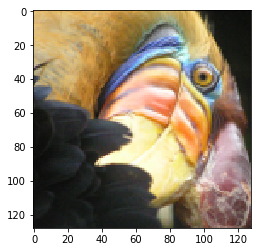

In [51]:
plt.figure()
plt.imshow(img)

In [52]:
img = img / 255.0 # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = img.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = img.reshape(img_size[0] * img_size[1], 3)

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16 
max_iters = 10

In [53]:
X.shape

(16384, 3)

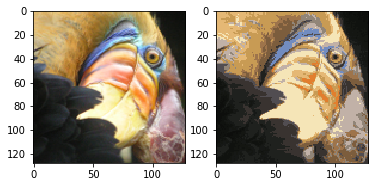

In [58]:
K = 16
random_centroids = X[sample(range(len(X)), K)]
val, idx = findClosestCentroids(X, random_centroids)
centoids = computeCentroids(X, idx, K)

compressed = np.array([centoids[i] for i in idx])
compressed = compressed.reshape(img_size[0], img_size[1], 3)

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(compressed)

#print(centoids)